# **Hackathon3**

## 1. EDA

## 2. Logistic regression analysis

## 3. Random forest

## 4. Decision tree

## 5. Conclusion 

Author: Mia (Yuhsin Hou), FangJung(Kristy) Lin, Sijie (Stephanie) Wang, Aastha chachra 

### Import necessary packages

In [1]:
import warnings 
import numpy as np
import pandas as pd
import os
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from scipy import stats
from pylab import rcParams
from matplotlib.pyplot import MultipleLocator

rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import resample
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image 

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from patsy import dmatrices
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import tree, metrics
from sklearn import preprocessing

from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
import pydotplus
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import graphviz
from sklearn.svm import SVC

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# **Part 1 - Data preprocessing**

## Load data

In [3]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSmZs0T2w34YuStG_-qexNtmwcKZbaFI5pKoAEmoyiA16JKH0CwDQjAQYBA0SzVXEF9A1BshiLwdiS4/pub?gid=702609015&single=true&output=csv'
my_df = pd.read_csv(data_path)

my_df.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


## Interpret data

In [4]:
list(my_df)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

In [5]:
my_df.shape

(30000, 25)

## The type of the columns can be found out as follows:

In [6]:
my_df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## Drop the unnecessary column

In [7]:
my_df.drop(['ID'], axis = 1, inplace =True) 
my_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Check the null data

In [8]:
# Counts all missing values and its percentage.
total = my_df.isnull().sum().sort_values(ascending = False)
frames = [total]
# # pd.concat(): axis=0 means index, axis=1 means column, keys = name of the column.
missing_data = pd.concat(frames, axis = 1, keys = ['Total'])
missing_data.head()

,Total
default.payment.next.month,0
PAY_AMT6,0
SEX,0
EDUCATION,0
MARRIAGE,0


In [9]:
my_df.describe().round()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0,30000.0
mean,167484.0,2.0,2.0,2.0,35.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,51223.0,49179.0,47013.0,43263.0,40311.0,38872.0,5664.0,5921.0,5226.0,4826.0,4799.0,5216.0,0.0
std,129748.0,0.0,1.0,1.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,73636.0,71174.0,69349.0,64333.0,60797.0,59554.0,16563.0,23041.0,17607.0,15666.0,15278.0,17777.0,0.0
min,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,50000.0,1.0,1.0,1.0,28.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3559.0,2985.0,2666.0,2327.0,1763.0,1256.0,1000.0,833.0,390.0,296.0,252.0,118.0,0.0
50%,140000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,22382.0,21200.0,20088.0,19052.0,18104.0,17071.0,2100.0,2009.0,1800.0,1500.0,1500.0,1500.0,0.0
75%,240000.0,2.0,2.0,2.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,67091.0,64006.0,60165.0,54506.0,50190.0,49198.0,5006.0,5000.0,4505.0,4013.0,4032.0,4000.0,0.0
max,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0


We can find some information useful:

1. There are 30,000 credit card clients.
2. The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.
3. Education level is mostly graduate school and university.
4. Most of the clients are either marrined or single (less frequent the other status).
5. Average age is 35.5 years, with a standard deviation of 9.2.

# Part2 - Make 5 observations about the data

## Explore Numerical Features

In [0]:
bill_amt_features = ['BILL_AMT'+ str(i) for i in range(1,7)]
pay_amt_features = ['PAY_AMT'+ str(i) for i in range(1,7)]
numerical_features = ['LIMIT_BAL','AGE'] + bill_amt_features + pay_amt_features

In [11]:
numerical_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

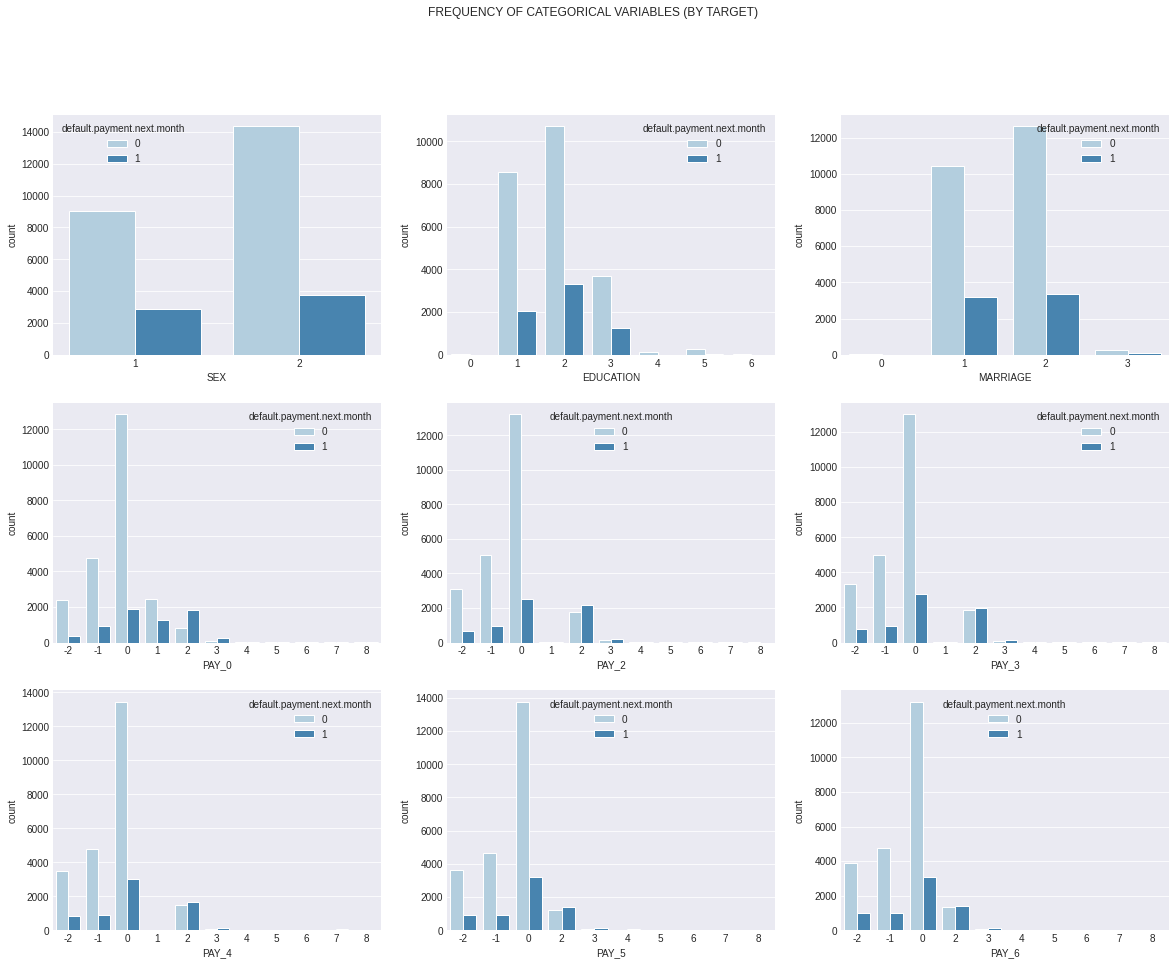

In [12]:
# Creating a new dataframe with categorical variables
subset = my_df[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default.payment.next.month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default.payment.next.month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default.payment.next.month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default.payment.next.month", data=subset, palette="Blues", ax=axes[2,2]);

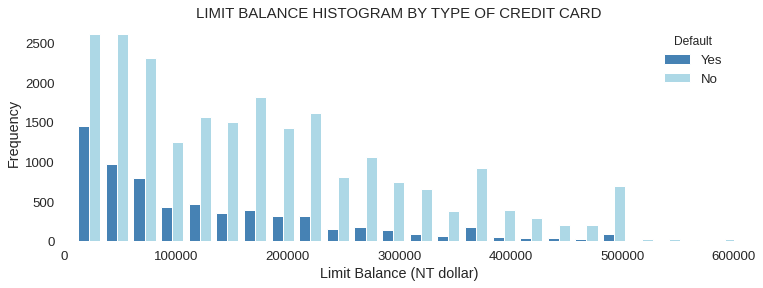

In [13]:
x1 = list(my_df[my_df['default.payment.next.month'] == 1]['LIMIT_BAL'])
x2 = list(my_df[my_df['default.payment.next.month'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

There are 30,000 credit card clients.  

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.  

Education level is mostly graduate school and university.  

Most of the clients are either marrined or single (less frequent the other status).  

Average age is 35.5 years, with a standard deviation of 9.2.  

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).  


## Correlation between all variables

Plote the heat map to show correlation between each variable

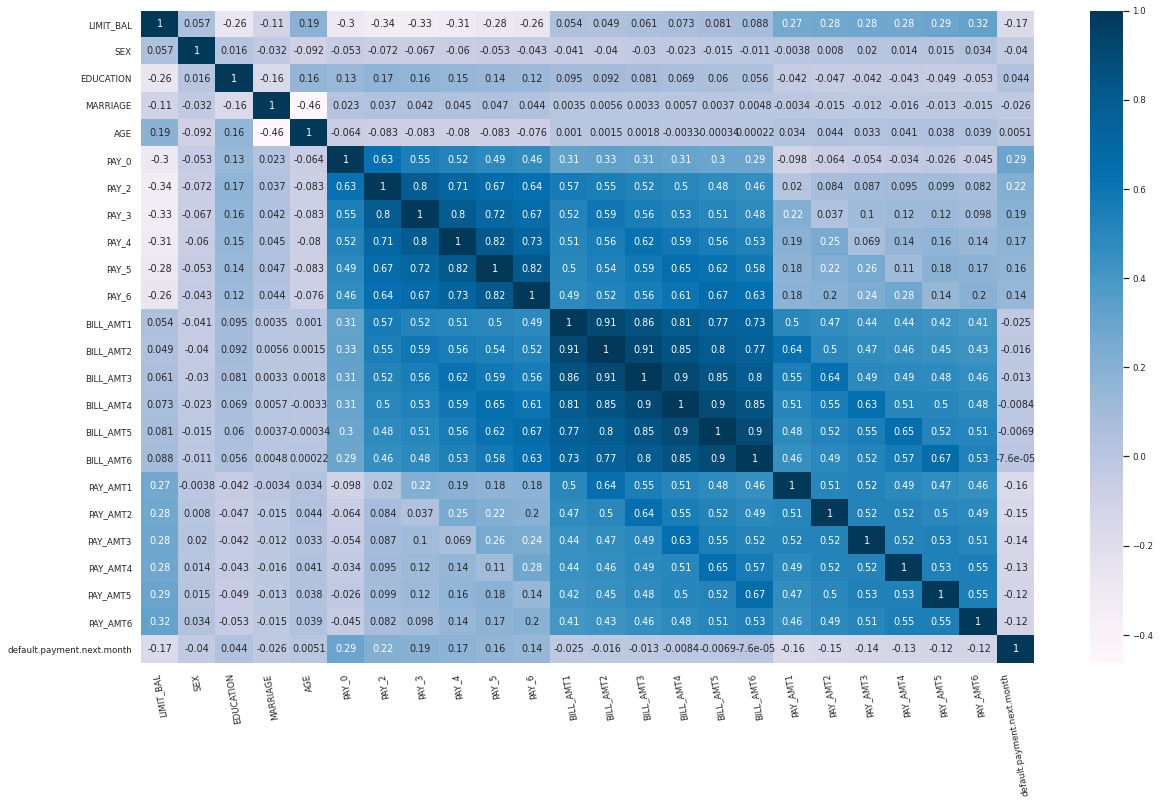

In [14]:
sns.set(font_scale=0.8)
plt.figure(figsize=(20,12))
sns.heatmap(my_df.corr('spearman'), annot=True, cmap = 'PuBu')
plt.xticks(rotation=100)
plt.show()

The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive.

## Limit Balance

Plot the histogram

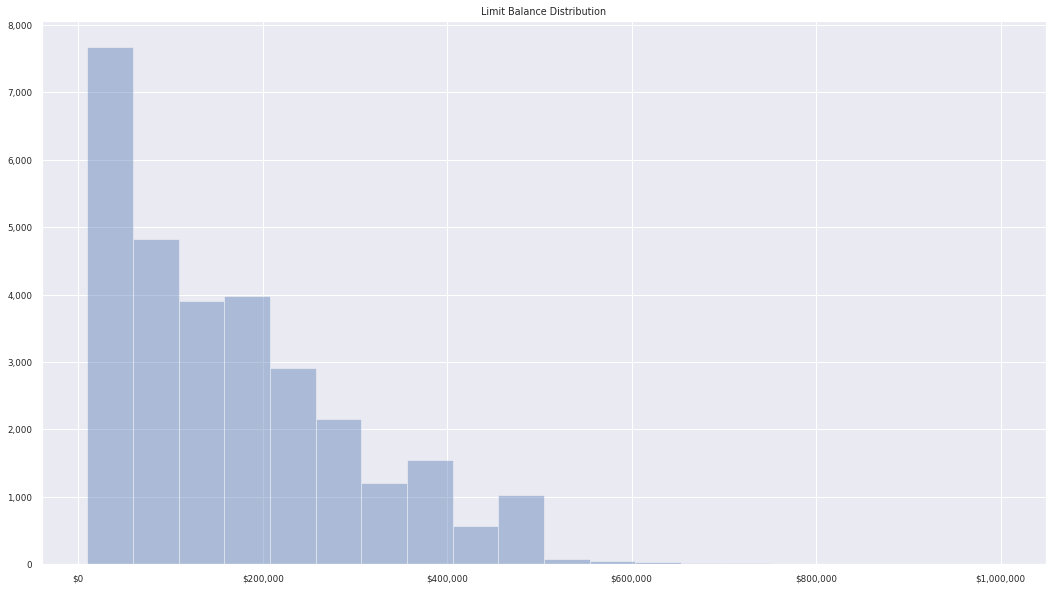

In [15]:
plt.figure(figsize=(18,10))
ax = sns.distplot(my_df.LIMIT_BAL, bins = 20, norm_hist=False, kde = False)
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

fmt2 = '{x:,.0f}'
tick2 = ticker.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

ax.set(title = 'Limit Balance Distribution', xlabel='', ylabel='');

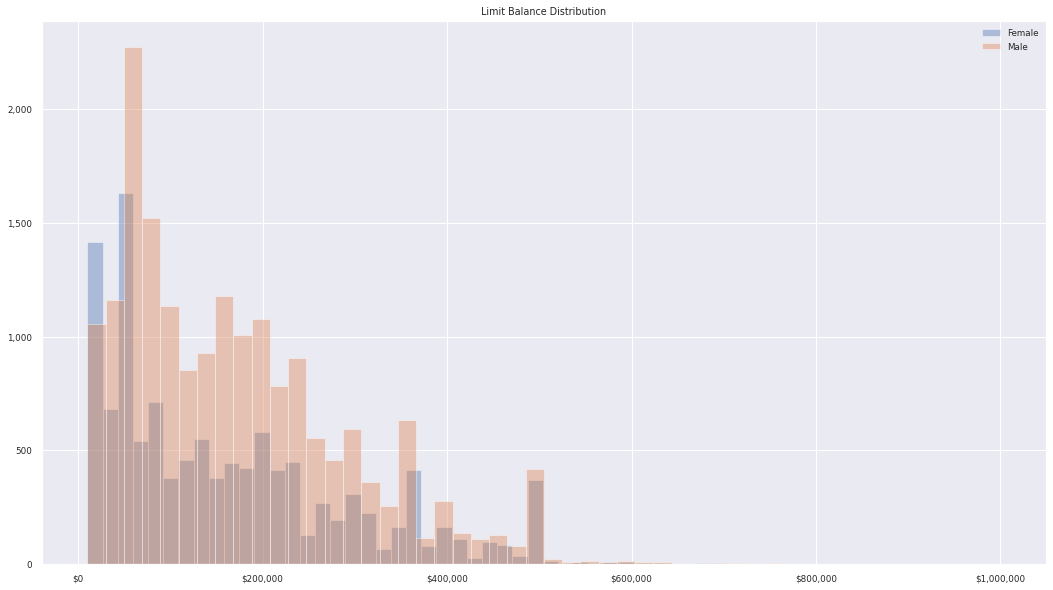

In [42]:
plt.figure(figsize=(18,10))
ax = sns.distplot(my_df[my_df['SEX'] == 1].LIMIT_BAL, norm_hist = False, kde = False, label = 'Female')
ax = sns.distplot(my_df[my_df['SEX'] == 2].LIMIT_BAL, norm_hist = False, kde=False, label = 'Male')
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)

fmt2 = '{x:,.0f}'
tick2 = ticker.StrMethodFormatter(fmt2)
ax.yaxis.set_major_formatter(tick2)

plt.legend()
ax.set(title = 'Limit Balance Distribution', xlabel='', ylabel='');

## Age Distribution by Gender and Default

Plot the histogram of Age Distribution by Gender and Default

[Text(0, 0.5, ''),
 [Text(0, 0, 'Female'), Text(0, 0, 'Male')],
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Age Distribution by Gender and Default')]

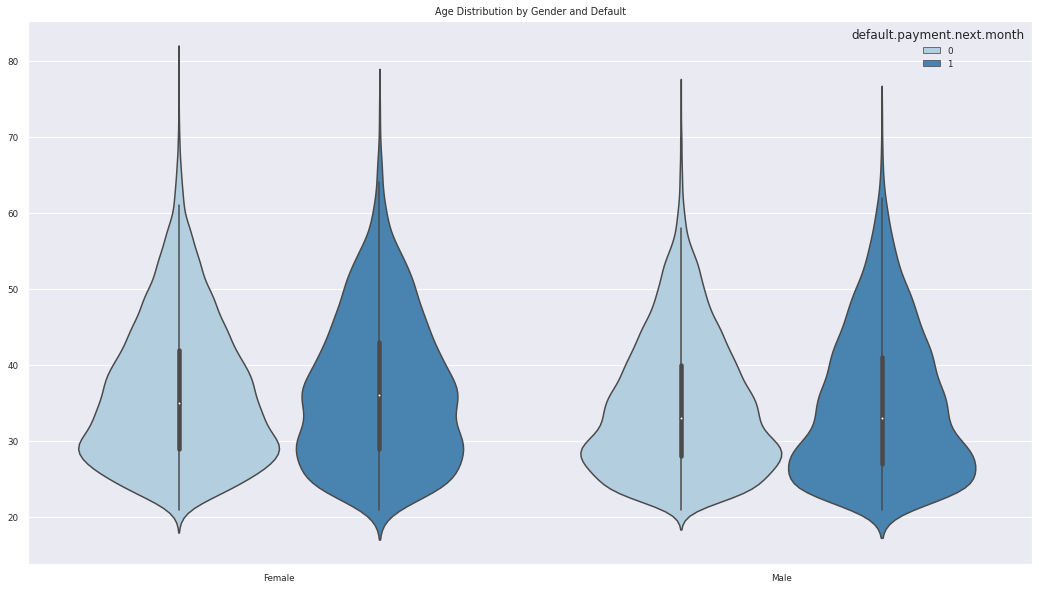

In [17]:
plt.figure(figsize=(18,10))
ax = sns.violinplot(x='SEX', y = 'AGE', hue = 'default.payment.next.month', data = my_df, palette = 'Blues')
ax.set(title = 'Age Distribution by Gender and Default', xlabel='', ylabel='', xticklabels=['Female', 'Male'])

## Bill Amount

In [18]:
my_df_melt = pd.melt(my_df, id_vars = 'default.payment.next.month', value_vars = bill_amt_features)
my_df_melt = my_df_melt.rename(columns = {'variable' : 'BILL_AMT'})
my_df_melt.head(6)

,default.payment.next.month,BILL_AMT,value
0,1,BILL_AMT1,3913.0
1,1,BILL_AMT1,2682.0
2,0,BILL_AMT1,29239.0
3,0,BILL_AMT1,46990.0
4,0,BILL_AMT1,8617.0
5,0,BILL_AMT1,64400.0


[Text(0, 0.5, ''),
 Text(0.5, 0, ''),
 Text(0.5, 1.0, 'Distribution of Bill Amounts')]

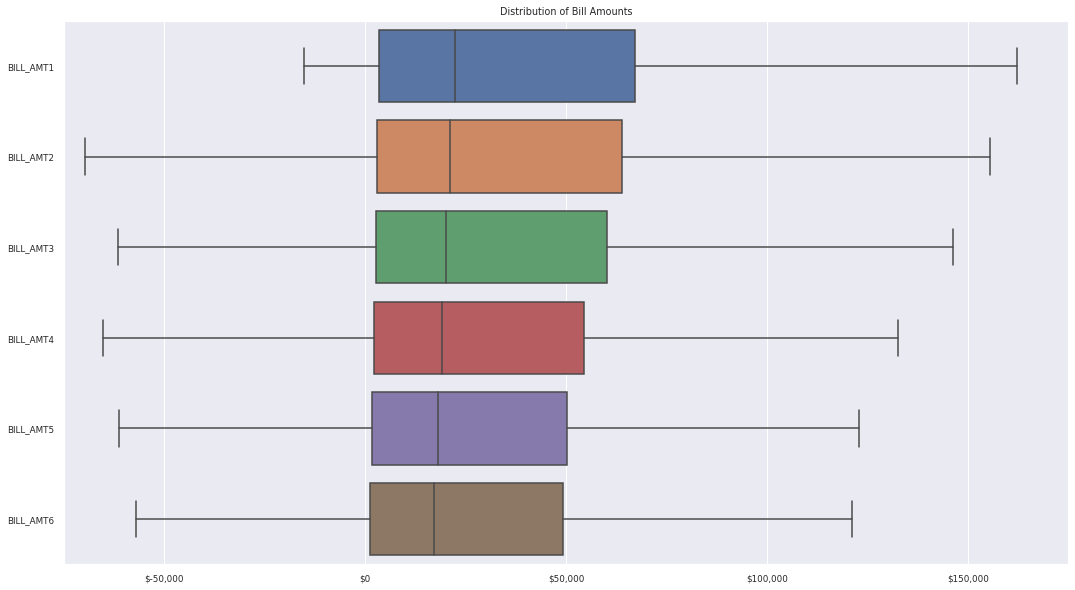

In [19]:
plt.figure(figsize=(18,10))
flierprops = dict(markerfacecolor='0.75', markersize=0, linestyle='none')
ax = sns.boxplot(data = my_df_melt, y = 'BILL_AMT', x = 'value', orient='h', showfliers = 'false', flierprops = flierprops)
plt.xlim(-75000, 175000)
fmt = '${x:,.0f}'
tick = ticker.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
ax.set(xlabel='', ylabel='', title = 'Distribution of Bill Amounts')

# Part3 - Any Classifier of your choosing

**Logistic Regression**

In [0]:
# Set X and y.

X = my_df.drop(['default.payment.next.month'], axis = 1)
y = my_df[['default.payment.next.month']]

# Train and test sets: 80% and 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [0]:
# Initialize Logistic Regressor 
lg = LogisticRegression(max_iter = 1000, random_state = 1)

In [24]:
# Fit the model
lg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
# Let's score the model
print('Accuracy score: ', lg.score(X_test, y_test).round(4))

Accuracy score:  0.7772


**To increase the accuracy score, I use the GridSearch to identify the best hyperparameters**


In [26]:
# Build logistic model classifier
pip_logmod = make_pipeline(StandardScaler(),
                           LogisticRegression(max_iter = 1000, random_state = 0))
hyperparam_range = np.arange(0, 5, 0.1)
hyperparam_grid = {'logisticregression__penalty': ['l1', 'l2'],
                   'logisticregression__C':  hyperparam_range,
                   'logisticregression__fit_intercept': [True, False]}

# Utilize GridSearch to find the best hyperparameters for running logistic regression
gs_logmodel = GridSearchCV(pip_logmod, hyperparam_grid, scoring = 'accuracy', n_jobs= -1)

gs_logmodel.fit(X, y.values.ravel())

print(f'The best hyperparameters:\n')

for hyperparam in gs_logmodel.best_params_.keys():
    print(hyperparam[hyperparam.find("__") + 2:], ": ", gs_logmodel.best_params_[hyperparam])

print(f'Best 5-folds CV accuracy: {gs_logmodel.best_score_ :.4f}.')

The best hyperparameters:

C :  0.9
fit_intercept :  True
penalty :  l2
Best 5-folds CV accuracy: 0.8100.


As the result, the average accuracy score have increased from 0.7772 to 0.8100.
I will develop a final model here with all data. 

In [27]:
# Rerun Logistic Regressor 
lg_2 = LogisticRegression(C = 0.9, max_iter = 1000, random_state = 1)

# Fit the model
lg_2.fit(X, y.values.ravel())

LogisticRegression(C=0.9, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
print(classification_report(y_test, lg_2.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      4663
           1       0.00      0.00      0.00      1337

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.60      0.78      0.68      6000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Part4 - Random Forest (RF) Classifier

In [29]:
col_name = my_df.columns.to_list()
col_name.remove('default.payment.next.month')
col_name

['LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [43]:
input_values_df = my_df[col_name]
x = input_values_df 
y = my_df['default.payment.next.month']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

clf = RandomForestClassifier(random_state = 10)
grid_values = {'max_depth': [10, 20],
               'min_samples_leaf': [2, 4],
               'n_estimators': [500, 1000]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv = 3, verbose = 0, scoring = 'accuracy')
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.826
Precision Score : 0.696969696969697
Recall Score : 0.36674259681093396
F1 Score : 0.4805970149253732


In [44]:
grid_clf_acc.best_params_

{'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000}

In [45]:
grid_clf_acc.cv_results_

{'mean_fit_time': array([13.33272751, 26.62233893, 13.26045116, 26.48939665, 20.15586845,
        40.27406526, 19.11057885, 39.12638076]),
 'mean_score_time': array([0.4405357 , 0.9102877 , 0.44297926, 0.94352508, 0.74673088,
        1.48089194, 0.72265363, 1.53989792]),
 'mean_test_score': array([0.81729167, 0.817625  , 0.81804167, 0.81829167, 0.81720833,
        0.81725   , 0.81770833, 0.818     ]),
 'param_max_depth': masked_array(data=[10, 10, 10, 10, 20, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[2, 2, 4, 4, 2, 2, 4, 4],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[500, 1000, 500, 1000, 500, 1000, 500, 1000],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
      

Based on the rank_test_score above, we noticed that the best model parameter is {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 1000}; and the second best model parameter is {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 500}.

# Part5 - Select three-performing mdoels

**What are the parameters configurations?**

* Logistic Regression: 

  C :  0.9  
  fit_intercept :  True  
  penalty :  l2  

* Random Forest: 

  1. Best model:   

    'max_depth': 10  
    'min_samples_leaf': 4  
    'n_estimators': 1000  

  2. Second best model:  

    'max_depth': 10  
    'min_samples_leaf': 4  
    'n_estimators': 500  










**What are the technical performance criteria?**

The best model is random forest. As the result above:

Accuracy Score : 0.826  
Precision Score : 0.696969696969697  
Recall Score : 0.36674259681093396  
F1 Score : 0.4805970149253732  


# Part6 - predict 5 values for X's not in the dataset

In [33]:
# Generate 5 samples for each variable. 
sample = {'LIMIT_BAL': [25000, 55000, 700000, 66000, 35000], 'SEX': [0, 0, 1, 1, 0], 'EDUCATION': [3, 1, 2, 3, 1],  'MARRIAGE': [0, 1, 0, 1, 0],
          'AGE': [25, 50, 31, 20, 40], 'PAY_0': [-1, 0, 1, 0, 1], 'PAY_2': [1, 0, -1, 1, 0], 'PAY_3': [1, 0, -1, 1, 0],
          'PAY_4': [1, 0, -1, 1, 0], 'PAY_5': [-2, 1, 0, 1, 1], 'PAY_6': [1, 1, 0, -2, -1], 'BILL_AMT1': [3000, 49876, 6278, 3673, 2628],
 'BILL_AMT2': [3736, 3736,4658, 0, 36383],
 'BILL_AMT3': [33647, 4864, 2756, 4737, 3345],
 'BILL_AMT4': [2635, 0, 26345, 37455, 47452],
 'BILL_AMT5': [2654, 3746, 47352, 37354, 47382],
 'BILL_AMT6': [26354, 3836, 48463, 3725, 3754], 'PAY_AMT1':[1000, 2000, 50000, 3500, 60000], 'PAY_AMT2':[0, 200, 10000, 6000, 68000], 
 'PAY_AMT3':[20000, 3500, 5900, 67000, 32000], 'PAY_AMT4':[0, 800, 10000, 80000, 9500] ,'PAY_AMT5': [3400, 65000, 8600, 2000, 40000], 
 'PAY_AMT6':[3200, 45000, 80000,60000, 38000]}

# Convert dict to dataframe.
arbitrary_values = pd.DataFrame(data = sample)
arbitrary_values

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,25000,0,3,0,25,-1,1,1,1,-2,1,3000,3736,33647,2635,2654,26354,1000,0,20000,0,3400,3200
1,55000,0,1,1,50,0,0,0,0,1,1,49876,3736,4864,0,3746,3836,2000,200,3500,800,65000,45000
2,700000,1,2,0,31,1,-1,-1,-1,0,0,6278,4658,2756,26345,47352,48463,50000,10000,5900,10000,8600,80000
3,66000,1,3,1,20,0,1,1,1,1,-2,3673,0,4737,37455,37354,3725,3500,6000,67000,80000,2000,60000
4,35000,0,1,0,40,1,0,0,0,1,-1,2628,36383,3345,47452,47382,3754,60000,68000,32000,9500,40000,38000


**Model 1: Logistic Regression**

In [34]:
# Now, let's use the model to predict default.payment.next.month for arbitrary values.

arbitrary_values.join(pd.DataFrame(lg_2.predict(arbitrary_values), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values.index)]))

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction
0,25000,0,3,0,25,-1,1,1,1,-2,1,3000,3736,33647,2635,2654,26354,1000,0,20000,0,3400,3200,0
1,55000,0,1,1,50,0,0,0,0,1,1,49876,3736,4864,0,3746,3836,2000,200,3500,800,65000,45000,0
2,700000,1,2,0,31,1,-1,-1,-1,0,0,6278,4658,2756,26345,47352,48463,50000,10000,5900,10000,8600,80000,0
3,66000,1,3,1,20,0,1,1,1,1,-2,3673,0,4737,37455,37354,3725,3500,6000,67000,80000,2000,60000,0
4,35000,0,1,0,40,1,0,0,0,1,-1,2628,36383,3345,47452,47382,3754,60000,68000,32000,9500,40000,38000,0


**Model 2: Random Forest (Best model)**

In [47]:
rf1 = RandomForestClassifier(max_depth= 10, min_samples_leaf = 4, n_estimators = 1000, random_state = 10)
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [48]:
arbitrary_values.join(pd.DataFrame(rf1.predict(arbitrary_values), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values.index)]))

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction
0,25000,0,3,0,25,-1,1,1,1,-2,1,3000,3736,33647,2635,2654,26354,1000,0,20000,0,3400,3200,0
1,55000,0,1,1,50,0,0,0,0,1,1,49876,3736,4864,0,3746,3836,2000,200,3500,800,65000,45000,0
2,700000,1,2,0,31,1,-1,-1,-1,0,0,6278,4658,2756,26345,47352,48463,50000,10000,5900,10000,8600,80000,0
3,66000,1,3,1,20,0,1,1,1,1,-2,3673,0,4737,37455,37354,3725,3500,6000,67000,80000,2000,60000,0
4,35000,0,1,0,40,1,0,0,0,1,-1,2628,36383,3345,47452,47382,3754,60000,68000,32000,9500,40000,38000,0


**Model 3: Random Forest (The second best model)**

In [49]:
rf2 = RandomForestClassifier(max_depth = 10, min_samples_leaf = 4, n_estimators = 500, random_state = 10)
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [50]:
arbitrary_values.join(pd.DataFrame(rf2.predict(arbitrary_values), columns = {'Prediction'}).set_index([pd.Index(arbitrary_values.index)]))

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction
0,25000,0,3,0,25,-1,1,1,1,-2,1,3000,3736,33647,2635,2654,26354,1000,0,20000,0,3400,3200,0
1,55000,0,1,1,50,0,0,0,0,1,1,49876,3736,4864,0,3746,3836,2000,200,3500,800,65000,45000,0
2,700000,1,2,0,31,1,-1,-1,-1,0,0,6278,4658,2756,26345,47352,48463,50000,10000,5900,10000,8600,80000,0
3,66000,1,3,1,20,0,1,1,1,1,-2,3673,0,4737,37455,37354,3725,3500,6000,67000,80000,2000,60000,0
4,35000,0,1,0,40,1,0,0,0,1,-1,2628,36383,3345,47452,47382,3754,60000,68000,32000,9500,40000,38000,0


# Part7 - Compare and Contrast the output from the models

**Logistic Regression**

In [39]:
#Predict values based on new parameters
y_pred_acc = lg_2.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.7803333333333333
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


**Random Forest (The best model)**

In [51]:
#Predict values based on new parameters
y_pred_acc = rf1.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.826
Precision Score : 0.696969696969697
Recall Score : 0.36674259681093396
F1 Score : 0.4805970149253732


**Random Forest (The second best model)**

In [52]:
#Predict values based on new parameters
y_pred_acc = rf2.predict(X_test)

# New Model Evaluation metrics
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.826
Precision Score : 0.6998535871156661
Recall Score : 0.36294608959757024
F1 Score : 0.47800000000000004


# Part8 - Explain the implication of the results and how they may or may not be used

**We chose the random forest model (the second best model).** 

(Since we are dealing with inbalanced dataset, the accuracy is not the best metric to use. We should also compare the F1 score and precision score.)


For Logistic Regression, the accuracy score is 0.78; however, the Precision Score, Recall Score, and F1 Scores are 0. That is because in the logistic regression, the model predicts that all customers will pay back and in the test data, the most of customers paid the moeny back. Therefore, even the model predicts that all customers will pay back, the accuracy of score will keep high and other scores (precision, recall, F1) will stay low.

For Random Froest, we figured out that the F1 scores for random froest (the best model model) is higher than the other one. Therefore, we chose the forest model (the best model) as the best performance model.